This notebook provides an environment to test the different models generated by different train datasets. 

1. Prediction
2. Plot accuaracy and loss
3. Confusion matrix 


In [1]:
import matplotlib.pyplot as plt

import numpy as np
from numpy import expand_dims

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img



# Choose the model you want to use for testing

In [2]:
model1 = load_model('models/cleanedAndAugumented_100px.h5')
model2 = load_model('models/cleanedAndAugumented_180px.h5')
model3 = load_model('models/cleanedAndAugumented_256px.h5')



2022-11-04 14:53:44.362723: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
def confusionMatrix(model, img_height, img_width, batch_size, test_data_dir = '/Users/boyfrankclaesen/workspace/makeAIWork2/projects/apple_disease_classification/imageClassifier/data/Test'):
  
  test_ds = tf.keras.utils.image_dataset_from_directory(
      test_data_dir,
      seed=123,
      image_size=(img_height, img_width),
      batch_size=batch_size)
  test_label = test_ds.class_names
  print(test_label)
  
  batchPredictions = model.predict(test_ds)
  predicted_categories = tf.argmax(batchPredictions, axis=1)
  true_categories = tf.concat([y for x, y in test_ds], axis=0)
  result_confusion_matrix = confusion_matrix(true_categories, predicted_categories)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

  cm_display.plot()
  plt.show()

# Generate Confusion Matrix

Found 120 files belonging to 4 classes.
['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


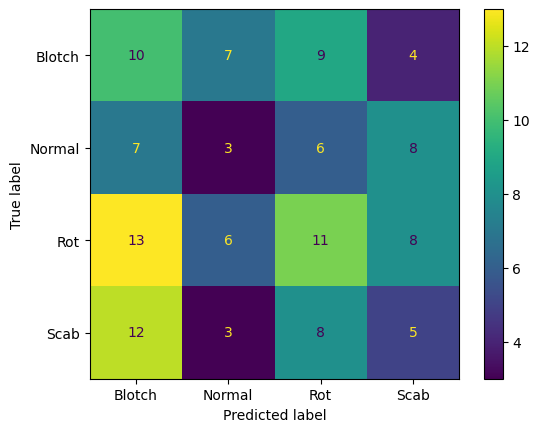

In [6]:
confusionMatrix(model1, 100, 100, 32)

Found 120 files belonging to 4 classes.
['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


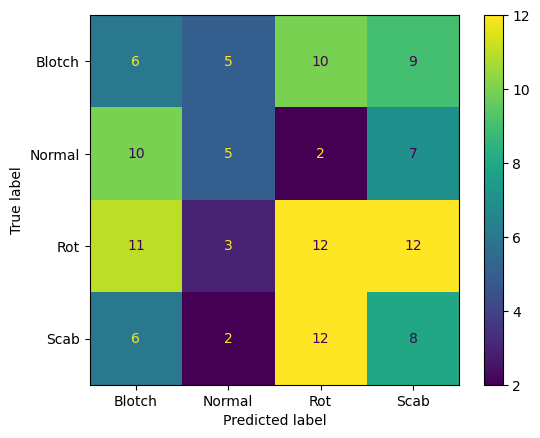

In [7]:
confusionMatrix(model2, 180, 180, 32)

Found 120 files belonging to 4 classes.
['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


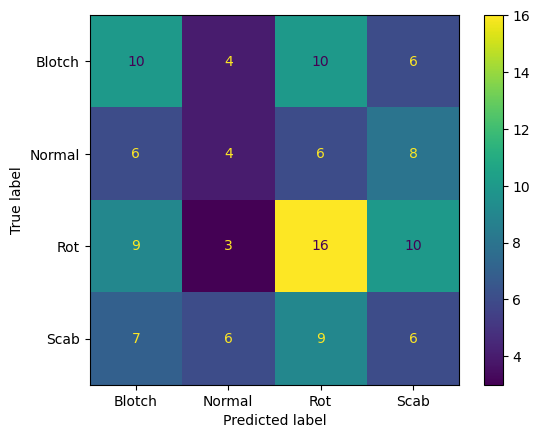

In [8]:
confusionMatrix(model3, 256, 256, 32)